REFERENCE
- Textbook: “Numerical Methods for Engineers, 8th edition” Steven C. Chapra and Raymond P. Canale, ISBN:1260232077, Copyright year:2021, McGraw-Hill.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option("display.max_rows", None)

### Problem 28.1

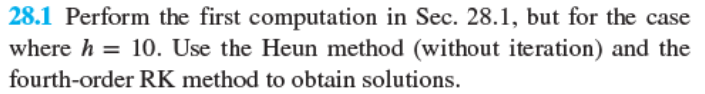

(1) For the above problem:
$$
V\frac{dc}{dt}=Qc_{in}-Qc
$$
$$
c_{in}=50, q=5, V=100, c_0=10
$$
(2) Transform it to ODE with initial value:
$$
\frac{dc}{dt}=2.5-0.05c
$$
$$
c(t=0)=10
$$
(3) Anlytical solultion:
$$
c=50(1-e^{-0.05t})+10e^{-0.05t}
$$

### Answer

1. Define Functions

In [2]:
# reference: the following code refers to my previous assignments (pseudocode in the figure 25.13)
def heun(f, x, y, h, x_t):
    """
    This function implements the simple Heun without iteration method.

    f: the derivative function of y(x)
    x: the initial value of x
    y: the initial value of y
    h: the step size
    x_t: the end value of x
    
    Returns: a list contains the values of y in all steps
    """
    
    y_list = []
    while x < x_t + h:
        y_list.append(y)
        print("x: {:.1f}, y: {:.4f}".format(x, y))
        # calculate the proper slope
        k1 = f(x, y)
        k2 = f(x + h, y + k1 * h)
        slope = (k1 + k2)/2
        # for next pair of (x, y)
        x += h
        y = y + slope * h
    
    return y_list

In [3]:
# reference: pseudocode for the 4th order RK method in the figure 25.17
def rk4(f, x, y, h, x_t):
    """
    This function implements the fourth-order RK method.

    f: the derivative function of y(x)
    x: the initial value of x
    y: the initial value of y
    h: the step size
    x_t: the end value of x
    
    Returns: a list contains the values of y in all steps
    """
    
    y_list = []
    while x < x_t + h:
        y_list.append(y)
        print("x: {:.1f}, y: {:.4f}".format(x, y)) 
        # define a proper slope
        k1 = f(x, y)
        k2 = f(x + 1/2 * h, y + 1/2 * k1 * h)
        k3 = f(x + 1/2 * h, y + 1/2 * k2 * h)
        k4 = f(x + h, y + k3 * h)
        slope = (k1 + 2 * k2 + 2 * k3 + k4) / 6
        # determine the next (x, y)
        x += h
        y = y + slope * h
    
    return y_list

2. Problem Solving

In [4]:
# the derivative function from the problem
def p1_f(x, y):
    return 2.5 - 0.05 * y

In [5]:
# (a) Heun method without iteration
p1_y_heun = heun(x=0, y=10, h=10, f=p1_f, x_t=50)

x: 0.0, y: 10.0000
x: 10.0, y: 25.0000
x: 20.0, y: 34.3750
x: 30.0, y: 40.2344
x: 40.0, y: 43.8965
x: 50.0, y: 46.1853


In [6]:
# (b) 4th Order RK method
p1_y_rk4 = rk4(x=0, y=10, h=10, f=p1_f, x_t=50)

x: 0.0, y: 10.0000
x: 10.0, y: 25.7292
x: 20.0, y: 35.2732
x: 30.0, y: 41.0642
x: 40.0, y: 44.5780
x: 50.0, y: 46.7101


3. Plot

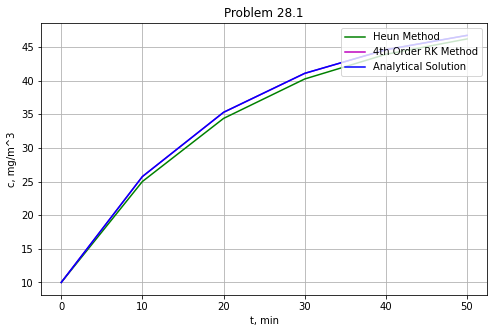

In [8]:
def p1_analytical(x):    
    result = 50 * (1 - np.exp(-0.05 * x)) + 10 * np.exp(-0.05 * x)
    return result

x = np.linspace(0, 50, 6)
p1_y_analytical = p1_analytical(x)

plt.figure(figsize = (8, 5))
plt.plot(x, p1_y_heun, 'g', label='Heun Method')
plt.plot(x, p1_y_rk4, 'm', label='4th Order RK Method') # almost same as analytical solution
plt.plot(x, p1_y_analytical, 'b', label='Analytical Solution')
plt.title('Problem 28.1')
plt.xlabel('t, min')
plt.ylabel('c, mg/m^3')
plt.legend(loc='upper right')
plt.grid()

### Problem 28.4

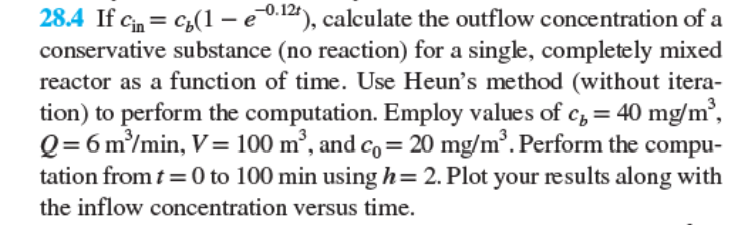

(1) For the above problem:
$$
V\frac{dc}{dt}=Qc_{in}-Qc
$$
$$
c_{in}=c_b(1-e^{-0.12t})
$$
$$
c_b=40 ,q=6, V=100, c_0=20
$$
(2) Transform it to ODE with initial value:
$$
\frac{dc}{dt}=2.4(1-e^{-0.12t}) -0.06c
$$
$$
c(t=0)=20
$$

### Answer

1. Define Functions

2. Problem Solving

In [9]:
# the derivative function from the problem
def p2_f(x, y):
    return 2.4 * (1 - np.exp(-0.12 * x)) - 0.06 * y

In [10]:
p2_y_heun = heun(x=0, y=20, h=2, f=p2_f, x_t=100)

x: 0.0, y: 20.0000
x: 2.0, y: 18.2561
x: 4.0, y: 17.5624
x: 6.0, y: 17.6183
x: 8.0, y: 18.1960
x: 10.0, y: 19.1239
x: 12.0, y: 20.2740
x: 14.0, y: 21.5514
x: 16.0, y: 22.8869
x: 18.0, y: 24.2309
x: 20.0, y: 25.5483
x: 22.0, y: 26.8156
x: 24.0, y: 28.0174
x: 26.0, y: 29.1445
x: 28.0, y: 30.1924
x: 30.0, y: 31.1597
x: 32.0, y: 32.0476
x: 34.0, y: 32.8587
x: 36.0, y: 33.5966
x: 38.0, y: 34.2657
x: 40.0, y: 34.8707
x: 42.0, y: 35.4163
x: 44.0, y: 35.9075
x: 46.0, y: 36.3488
x: 48.0, y: 36.7446
x: 50.0, y: 37.0992
x: 52.0, y: 37.4165
x: 54.0, y: 37.7001
x: 56.0, y: 37.9534
x: 58.0, y: 38.1794
x: 60.0, y: 38.3810
x: 62.0, y: 38.5606
x: 64.0, y: 38.7206
x: 66.0, y: 38.8631
x: 68.0, y: 38.9899
x: 70.0, y: 39.1027
x: 72.0, y: 39.2030
x: 74.0, y: 39.2922
x: 76.0, y: 39.3715
x: 78.0, y: 39.4419
x: 80.0, y: 39.5045
x: 82.0, y: 39.5602
x: 84.0, y: 39.6096
x: 86.0, y: 39.6534
x: 88.0, y: 39.6924
x: 90.0, y: 39.7270
x: 92.0, y: 39.7577
x: 94.0, y: 39.7850
x: 96.0, y: 39.8092
x: 98.0, y: 39.8307
x: 10

3. Plot

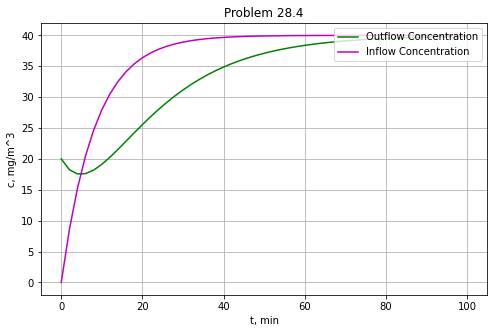

In [11]:
def p2_inflow_concentration(x):    
    return 40 * (1 - np.exp(-0.12 * x))

x = np.linspace(0, 100, 51)
p2_y_inflow_concentration = p2_inflow_concentration(x)

plt.figure(figsize = (8, 5))
plt.plot(x, p2_y_heun, 'g', label='Outflow Concentration')
plt.plot(x, p2_y_inflow_concentration, 'm', label='Inflow Concentration')
plt.title('Problem 28.4')
plt.xlabel('t, min')
plt.ylabel('c, mg/m^3')
plt.legend(loc='upper right')
plt.grid()